期望最大(EM-Expectation Maximization)算法与高斯混合模型(GMM-Gaussian Mixture Model)
===

# 1.概述
## 1.1.概述
EM算法本质上来说是一种寻找问题最优解的优化算法，高斯混合模型是EM算法的一个典型的应用场景。常见的寻找问题最优解的方法：
- EM算法
- 梯度下降法 - 线性回归
- 坐标上升法 - 支持向量机
- 极大似然估计 - 逻辑回归

EM算法是一个无监督算法，一种聚类的算法。这个算法思想简单，但是推导复杂。它的本质就是极大似然估计法求解未知参数的最优解。极大似然估计是求解参数的最优解，EM算法对其进行了推广，能够叫它处理更复杂的问题，这些问题中多了一些隐变量。

## 1.2.应用场景
- 高斯混合模型
- K-Means聚类
- HMM-隐马尔可夫模型

比如观察人的身高，符合正态分布，那么参数就有两个$(\mu,\sigma^2)$,我们现在有100个男性的身高和100个女性的身高,那么求解均值和标准差的过程就是估计高斯分布的参数,可以直接根据公式
$$
\begin{cases}
\hat{\mu}&=\frac{1}{n}\sum_{i=1}^nx_i=\overline{x}\\\\
\hat{\sigma}^2&=\frac{1}{n}\sum_{i=1}^n(x_i-\overline{x})^2
\end{cases}
$$
上述问题中，我们是性别已知的，但是如果我们收集了200个人的身高，而性别未知，又该如何处理？这样就涉及到了两个分布、两个分布的参数.那么首先需要先性别估计，然后才能估计高斯分布.这个时候就需要用到EM算法，性别估计的参数就是隐变量这个时候，对于每一个样本或者你抽取到的人，就有两个东西需要猜测或者估计的了，一是这个人是男的还是女的？二是男生和女生对应的身高的高斯分布的参数是多少？只有当我们知道了哪些人属于同一个高斯分布的时候，我们才能够对这个分布的参数作出靠谱的预测，例如刚开始的最大似然所说的，但现在两种高斯分布的人混在一块了，我们又不知道哪些人属于第一个高斯分布，哪些属于第二个，所以就没法估计这两个分布的参数。反过来，只有当我们对这两个分布的参数作出了准确的估计的时候，才能知道到底哪些人属于第一个分布，那些人属于第二个分布。

## 1.3.EM算法和坐标上升法的对比
EM算法就是这样，假设我们想估计知道A和B两个参数，在开始状态下二者都是未知的，但如果知道了A的信息就可以得到B的信息，反过来知道了B也就得到了A。可以考虑首先赋予A某种初值，以此得到B的估计值，然后从B的当前值出发，重新估计A的取值，这个过程一直持续到收敛为止。这里把每个人的完整描述看做是三元组$y_i=\{x_i,z_{i1},z_{i2}\}$，其中，$x_i$是第i个样本的观测值，也就是对应的这个人的身高，是可以观测到的值。$z_{i1}$和$z_{i2}$表示男生和女生这两个高斯分布中哪个被用来产生值$x_i$，就是说这两个值标记这个人到底是男生还是女生（的身高分布产生的）。这两个值我们是不知道的，是隐含变量。确切的说，$z_{ij}$在$x_i$由第j个高斯分布产生时值为1，否则为0。例如一个样本的观测值为1.8，然后他来自男生的那个高斯分布，那么我们可以将这个样本表示为{1.8, 1, 0}。如果$z_{i1}$和$z_{i2}$的值已知，也就是说每个人我已经标记为男生或者女生了，那么我们就可以利用上面说的最大似然算法来估计他们各自高斯分布的参数。但是它们未知，因此我们只能用EM算法
- 坐标上升法：假设我们想估计知道A和B两个参数，在开始状态下二者都是未知的，但如果知道了A的信息就可以得到B的信息，反过来知道了B也就得到了A
- EM算法：首先赋予A初始值，以此得到B的估计值，然后从B的当前值触发，重新估计A的取值，这个过程一直持续到收敛为止

EM算法本质上就是一个坐标上升法

## 1.4.EM算法和K-Means算法的对比
K-Means算法是一种聚类算法，它最后得到的结果会把样本唯一的分到一类中，但无法给出某个样本属于该簇的后验概率。而EM算法最后得到的是这个样本属于任何一种分类的概率

## 1.5.混合高斯模型
随机变量X由K个高斯分布混合而成，取各个高斯分布的概率为$\pi_1,\pi_2,...,\pi_K$，第i个高斯分布的均值为$\mu_i$，方差为$\sum_i$。若观测到随机变量X的一系列样本$x_1,x_2,...,x_n$，试估计参数$\pi,\mu,\sum$。高斯分布是指数族分布，但是混合高斯模型就不是指数族分布了。若$x_1,x_2,...,x_n$中，每一个都是一个n维的向量，那么$\mu_i$也是一个n维的向量，方差$\sum_i$就是一个$n*n$的协方差矩阵(对称的，半正定的矩阵)

# 2.混合高斯模型解法
## 2.1.似然函数与对数似然
- 似然函数:$L_{\pi,\mu,\sum}(x)=\prod_{i=1}^N\prod_{k=1}^K\pi_kN(x_i|\mu_k,\sum_k)$
- 对数似然:$\ell_{\pi,\mu,\sum}(x)=\sum_{i=1}^Nlog[\sum_{k=1}^K\pi_kN(x_i|\mu_k,\sum_k)]$

如果给定了$\mu_k,\sum_k$的时候，算第i个样本$x_i$属于第k个高斯分布的概率就是$N(x_i|\mu_k,\sum_k)$.对于在对数函数里面又有加和，无法直接用求导解方程的办法直接求得最大值。为了解决这个问题，我们分成两步

## 2.2.第一步-估算数据来自哪个组份
估计数据由每个组份生成的概率:对于每个样本$x_i$,它由第k个组份生成的概率为
$$\gamma(i,k)=\frac{\pi_kN(x_i|\mu_k,\sum_k)}{\sum_{j=1}^K\pi_jN(x_i|\mu_j,\sum_j)}$$
上式中的$\mu$和$\sum$也是待估计的值，因此采样迭代法: 在计算$\gamma(i,k)$时假定$\mu$和$\sum$已知;
- 需要先验给定$\mu$和$\sum$。
- $\gamma(i,k)$亦可看成组份k在生成数据$x_i$时所做的贡献

## 2.3.第二步-估计每个组份的参数
对于所有的样本点，对于组份k而言，可看做生成了$\{\gamma(i,k)x_i|i=1,2,...,N\}$这些点。组份k是一个标准的高斯分布，利用上面的结论
$$
\begin{cases}
N_k=\sum_{i=1}^N\gamma(i,k)\\\\
\mu_k=\frac{1}{N}\sum_{i=1}^N\gamma(i,k)x_i\\\\
\sum_k=\frac{1}{N_k}\sum_{i=1}^N\gamma(i,k)(x_i-\mu_k)(x_i-\mu_k)^T\\\\
\pi_k=\frac{N_k}{N}=\frac{1}{N}\sum_{i=1}^N\gamma(i,k)
\end{cases}
$$

# 3.EM算法思想
对于未知性别的估计，高斯概率密度函数要求知道两个参数，就可以知道具体的性别；极大似然要求知道性别，就能知道高斯分布参数。这就陷入了死循环。所以就引入了EM算法。

## 3.1.问题提出
假定有训练集$\{x^{(1)},x^{(2)},...,x^{(m)}\}$,包含m个独立样本，希望从中找到该组数据的模型p(x,z)的参数。其中x是已经观察到的参数，z是未观测到的参数

## 3.2.通过最大似然估计建立目标函数
- 似然函数$L(\theta)=\prod_p(x;\theta)$
- 对数似然$\ell(\theta)=\sum_{i=1}^mlogp(x;\theta)=\sum_{i=1}^mlog\sum_zp(x,z;\theta)$

z是隐随机变量，不方便直接找到参数估计。策略:计算$\ell(\theta)$下界，求该下界的最大值; 重复该过程，直到收敛到局部最大值。本质上，我们需要使得上述式子最大化，但是可以看到里面有“和的对数”，求导后形式会非常复杂（自己可以想象下$log(f_1(x)+ f_2(x)+ f_3(x)+…)$复合函数的求导），所以很难求解得到未知参数z和$\theta$

## 3.3.Jenson不等式
我们的推导需要用到Jenson不等式。令$Q_i$是z的某一个分布，其中$Q_i > 0$，则对数似然函数为
$$
\begin{eqnarray}
\ell(\theta)&=&\sum_{i=1}^mlogp(x;\theta)\\
&=&\sum_{i=1}^mlog\sum_zp(x,z;\theta)\\
&=&\sum_ilog\sum_{z^{{i}}}Q_i(z^{(i)})*\frac{p(x^{(i)}, z^{(i)}; \theta)}{Q_i(z^{(i)})}
\end{eqnarray}
$$
对于一个随机变量X：
- 如果f是凸函数，那么$E[f(X)]>=f(E[X])$
- 如果f是凹函数，那么$E[f(X)]<=f(E[X])$

E就是期望我们知道
$$E[f(X)]=\sum\limits_i^np_iz_i$$
其中$\sum\limits_i^np_i=1$，其含义就是对于函数f(x)上每个可能取值的点的一个加权平均，那么$f(E[X])$的含义是，对于可能取值的X的加权平均，然后在求解函数值,$logY$是一个凹函数。我们现在需要关心的是什么时候相等。如下图所示的凸函数

![images](Images/10_001.png)

无论是凸函数还是凹函数，当且仅当自变量X是常数的时候，等式成立。我们令
$$\varphi=\frac{p(x^{(i)}, z^{(i)}; \theta)}{Q_i(z^{(i)})}$$
则
$$log\sum_{z^{{i}}}Q_i(z^{(i)})*\frac{p(x^{(i)},z^{(i)};\theta)}{Q_i(z^{(i)})}=log\sum_{z^{{i}}}Q_i(z^{(i)}) \bullet \varphi$$

因为$Q_i(z^{(i)})$是关于z的某一个分布,那么$\sum_{z^{{i}}}Q_i(z^{(i)}) \bullet \varphi$其实就是在$\varphi$上关于$Q_i(z^{(i)})$分布求期望$E_Q(\varphi)$，所以可以变化为$logE_Q(\varphi)$，那么根据Jenson不等式，我们知道，log是凹函数，所以必有
$$
\begin{eqnarray}
&logE_Q(\varphi)& \geq E_Qlog(\varphi)\\
&\Rightarrow& log\sum_{z^{{i}}}Q_i(z^{(i)}) \bullet \varphi \geq \sum_{z^{{i}}}Q_i(z^{(i)}) \bullet log(\varphi)
\end{eqnarray}
$$
由于任意i都有这个特性，那么则有
$$\sum_i^mlog\sum_{z^{{i}}}Q_i(z^{(i)})*\frac{p(x^{(i)}, z^{(i)}; \theta)}{Q_i(z^{(i)})} \geq \sum_i^m\sum_{z^{{i}}}Q_i(z^{(i)}) \bullet log(\frac{p(x^{(i)}, z^{(i)}; \theta)}{Q_i(z^{(i)})})$$






这样我们求
$$\sum_i^m\sum_{z^{{i}}}Q_i(z^{(i)}) \bullet log(\frac{p(x^{(i)}, z^{(i)}; \theta)}{Q_i(z^{(i)})})$$
的极大值就可以了

## 3.4.推导
那么上面的式子什么时候可以取等号呢？由于log函数是一个严格意义上的凹函数，那么只要$x_1 \neq x_2$，那么$log(x_1) \neq log(x_2)$，所以只有$x_1=x_2$，才有可能使得log值相等。对于
$$\sum_i^m\sum_{z^{{i}}}Q_i(z^{(i)}) \bullet log(\frac{p(x^{(i)}, z^{(i)}; \theta)}{Q_i(z^{(i)})})$$
而言，$Q$是一个随机分布，那么必须要求
$$log(\frac{p(x^{(i)}, z^{(i)}; \theta)}{Q_i(z^{(i)})})$$
取定值，才能相等，去掉log，也就是相当于
$$\frac{p(x^{(i)}, z^{(i)}; \theta)}{Q_i(z^{(i)})}$$
取定值才能保证等号成立。设置$\frac{p(x^{(i)}, z^{(i)}; \theta)}{Q_i(z^{(i)})}=C$
$$
\begin{eqnarray}
&\Rightarrow& p(x^{(i)}, z^{(i)}; \theta)=Q_i(z^{(i)})C \\
&\Rightarrow& \sum_{z=1}^np(x^{(i)}, z^{(i)}; \theta)=\sum_{z=1}^nQ_i(z^{(i)})C\\
&\Rightarrow& \sum_{z=1}^np(x^{(i)}, z^{(i)}; \theta)=C*\sum_{z=1}^nQ_i(z^{(i)})\\
&\because& \sum_zQ_i(z^{(i)})=1,\frac{p(x^{(i)}, z^{(i)}; \theta)}{Q_i(z^{(i)})}=C\\
&\Rightarrow& \sum_{z=1}^np(x^{(i)}, z^{(i)}; \theta)=C\\
&\Rightarrow& Q_i(z^{(i)})=\frac{p(x^{(i)}, z^{(i)}; \theta)}{C}\\
&\Rightarrow& Q_i(z^{(i)})=\frac{p(x^{(i)}, z^{(i)}; \theta)}{\sum_{z=1}^np(x^{(i)}, z^{(i)}; \theta)}\\
\sum_{z=1}^np(x^{(i)}, z^{(i)}; \theta)&=&p(x^{(i)};\theta)\\
Q_i(z^{(i)})&=&\frac{p(x^{(i)}, z^{(i)}; \theta)}{p(x^{(i)};\theta)}\\
Q_i(z^{(i)})&=&p(z^{(i)}|x^{(i)};\theta)
\end{eqnarray}
$$

## 3.5.EM算法
就有了EM算法的伪代码如下:
- 初始化分布参数$\theta$
- 重复以下步骤并收敛
> - E步:$Q_i(z^{i}) := \frac{p(x^{(i)}, z^{(i)}; \theta)}{p(x^{(i)};\theta)}$,固定$\theta$优化Q
> - M步：$\theta := argmax_{\theta}\sum_i\sum_{z^{(i)}}Q_i(z^{(i)})log\frac{p(x^{(i)},z^{(i)}; \theta)}{Q_i(z^{(i)})}$,固定Q优化$\theta$

M步具体的$p(x^{(i)})$，需要根据具体的模型来计算(高斯混合模型可以看作M个高斯密度函数的线性组合)。E步要得到隐变量的分布，具体到身高的例子，就是要得到每一个样本是男性的概率是多少，是女性的概率是多少，注意归一化。M步就是要得到结果，具体到身高的例子，就是要得到高斯分布的均值和标准差

# 4.证明EM算法是收敛的
假定$\theta^t$和$\theta^{t+1}$是EM第t次和t+1次迭代后的结果，如果我们证明了$\varphi(\theta^t) \leq \varphi(\theta^{t+1})$，也就是说极大似然估计单调增加，那么最终我们会达到最大似然估计的最大值。

证明:选定$\theta^t$后，我们得到E步

![images](Images/10_002.png)

# 5.EM算法应用与混合高斯模型GMM
高斯混合模型可以看作M个高斯密度函数的线性组合

## 5.1.问题给出
随机变量X是有K个高斯分布混合而成，取各个高斯分布的概率为$\varphi_1,\varphi_2,...,\varphi_K$(先验概率)，第i个高斯分布的均值为$\mu_i$,方差为$\sum_i$。若观测到随机变量X的一系列样本$x_1,x_2,...,x_n$，试估计参数$\varphi,\mu,\sum$

## 5.2.E-Step
这一步计算条件概率
$$\omega_j^{(i)}=Q_i(z^{(i)}=j)=P(z^{(i)}=j|x^{(i)};\phi,\mu,\sum)$$
其中$\mu,\phi,\sum$是给定的初始值，这个就是要计算在给定样本$x^{(i)}$的情况下，计算第i个隐变量$z^{(i)}$属于某一个组份的概率，比如身高的例子中，样本198cm中可能有90%的概率是男的，10%的概率是女的，那么$\omega_m^{1.98}=0.9,\omega_f^{1.98}=0.1$

## 5.3.M-Step
将多项分布和高斯分布的参数带入
$$\sum_{i=1}^m\sum_{z^{(i)}}Q_i(z^{(i)})log\frac{p(x^{(i)},z^{(i)};\phi,\mu,\sum)}{Q_i(z^{(i)})}$$
其中$Q_i(z^{(i)})$就是E步算出来的$\omega$。M步需要计算的是当$\phi,\mu,\sum$取什么值的时候，上述的式子可以取到最大值。在上面的式子中，$z^{(i)}$是从1到K的，由于$p(x,z)=p(x|z) \bullet p(z)$，所以有
$$p(x^{(i)},z^{(i)};\phi,\mu,\sum)=p(x^{(i)}|z^{(i)};\mu,\sum) \bullet p(z^{(i)};\phi)$$
其中$p(x^{(i)}|z^{(i)};\mu,\sum)$，当给定了属于某一个组份后，它是符合高斯分布的，所以它只跟$\mu,\sum$有关；$p(z^{(i)};\phi)$是先验概率，只跟$\phi$有关，所以$p(z^{(i)};\phi)=\phi_j$
$$\sum_{i=1}^m\sum_{z^{(i)}}Q_i(z^{(i)})log\frac{p(x^{(i)},z^{(i)};\phi,\mu,\sum)}{Q_i(z^{(i)})}=\sum_{i=1}^m\sum_{j=1}^kQ_i(z^{(i)}=j)log\frac{p(x^{(i)}|z^{(i)}=j;\mu,\sum) \bullet p(z^{(i)}=j;\phi)}{Q_i(z^{(i)}=j)}$$
带入高斯密度函数
$$\Rightarrow \sum_{i=1}^m\sum_{j=1}^k\omega_j^{(i)}log\frac{\frac{1}{(2\pi)^{\frac{n}{2}}|\sum_j|^{\frac{1}{2}}}e^{[-\frac{1}{2}(x^{(i)}-\mu_j)^T\sum_j^{-1}(x^{(i)}-\mu_j)]} \bullet \phi_j}{\omega_j^{(i)}}$$
令这个式子为$\xi(\mu,\phi,\sum)$

### 5.3.1.对$\mu_i$求偏导
$$\frac{\partial{\xi(\mu,\phi,\sum)}}{\partial{\mu_l}}=-\frac{\partial{\xi(\mu,\phi,\sum)}}{\partial{\mu_l}}\sum_{i=1}^m\sum_{j=1}^k\omega_j^{(i)} \bullet \frac{1}{2} \bullet (x^{(i)}-\mu_j)^T \bullet \sum_j^{-1} \bullet (x^{(i)}-\mu_j)$$
如果$A$是对称阵，即$A=A^T$，那么
$$\frac{\partial{X^TAX}}{\partial{X}}=2AX$$
而$\sum_j$是一个协方差矩阵，协方差矩阵是对称阵，那么$\sum_j^{-1}$这个是协方差矩阵的逆矩阵，也是对称阵。所以有
$$
\begin{eqnarray}
& &\frac{1}{2}\sum_{i=1}^m\omega_l^{(i)} \bullet \frac{\partial{\xi(\mu,\phi,\sum)}}{\partial{\mu_l}}2\mu_l^T\sum_l^{-1}[x^{(i)}-\mu_l]=\sum_l^{-1}\sum_{i=1}^m\omega_l^{(i)}(x^{(i)}-\mu_l)=0\\
&\Rightarrow& \mu_l := \frac{\sum_{i=1}^m\omega_l^{(i)}x^{(i)}}{\sum_{i=1}^m\omega_l^{(i)}}
\end{eqnarray}
$$

### 5.3.2.对$\sum_j$求偏导
$$\sum_j=\frac{\sum_{i=1}^m\omega_j^{(i)}(x^{(i)}-\mu_j)(x^{(i)}-\mu_j)^T}{\sum_{i=1}^m\omega_j^{(i)}}$$

### 5.3.3.对$\phi_j$求偏导
删除常数项后原式子得到
$$\sum_{i=1}^m\sum_{j=1}^k\omega_j^{(i)}log\phi_j$$
但是直接对$\phi_j$求偏导令其为0是不对的，因为$\phi_j$的自由度没有那么大，有一个条件在约束着它$\sum_{j=1}^k\phi_j=1$，这个时候必须使用拉格朗日乘子法来计算
$$L(\phi)=\sum_{i=1}^m\sum_{j=1}^k\omega_j^{(i)}log\phi_j + \beta(\sum_{j=1}^k\phi_j-1)$$
此时不需要加上约束$\phi_j \geq 0$，因为$log\phi_j$已经保证了最后的$\phi > 0$
$$
\begin{eqnarray}
\frac{\partial{L}}{\partial{\phi}}&=&\sum_{i=1}^m\omega_j^{(i)}+\beta\phi_j=0, j=1,2,...,k\\\\
&\Rightarrow& \sum_{j=1}^k\sum_{i=1}^m\omega_j^{(i)}+\beta\sum_{j=1}^k\phi_j=0
&\Rightarrow& \sum_{j=1}^k\sum_{i=1}^m\omega_j^{(i)}+\beta=0\\\\
&\Rightarrow& \sum_{i=1}^m\sum_{j=1}^k\omega_j^{(i)}+\beta=0
\end{eqnarray}
$$
因为$\sum_{j=1}^k\omega_j^{(i)}=1$，所以$\beta=-m$，带入$\sum_{i=1}^m\omega_j^{(i)}+\beta\phi_j=0$，有
$$\sum_{i=1}^m\omega_j^{(i)}-m\phi_j=0 \Rightarrow \phi_j=\frac{\sum_{i=1}^m\omega_j^{(i)}}{m}$$

# 6.EM算法举例
## 6.1.场景
假设有两枚硬币(A,B)，两枚硬币中，A朝上概率为$\theta_A$，B朝上概率为$\theta_B$，结果向上H，向下记为T

## 6.2.实验一
实验员知道每次抛的是哪个硬币，然后做了5次试验，得出如下结果

| 硬币 |  第一次  |  第二次  |  第三次  |  第四次  |  第五次  |  第六次  |  第七次  |  第八次  |  第九次  |  第十次  |
| :--  | :------: | :------: | :------: | :------: | :------: | :------: | :------: | :------: | :------: | :------: |
|  B   |    H     |    T     |    T     |    T     |    H     |    H     |    T     |    H     |    T     |    H     |
|  A   |    H     |    H     |    H     |    H     |    T     |    H     |    H     |    H     |    H     |    H     |
|  A   |    H     |    H     |    H     |    H     |    H     |    H     |    H     |    T     |    H     |    H     |
|  B   |    H     |    T     |    H     |    T     |    T     |    T     |    H     |    H     |    T     |    T     |
|  A   |    T     |    H     |    H     |    H     |    T     |    H     |    H     |    H     |    T     |    H     |

对于硬币A和硬币B，我们可以统计出来两枚硬币总共出现的H和T的次数，硬币A出现24次H，6次T，硬币B出现9次H，11次T，所以有
$$
\begin{eqnarray}
\hat{\theta}_A&=&\frac{24}{24+6}=0.8\\
\hat{\theta}_B&=&\frac{9}{9+11}=0.45
\end{eqnarray}
$$

## 6.3.实验二
但是这次实验员忘记了每次抛出的是哪个硬币了，只是知道做完五次实验后的结果如下表

|  第一次  |  第二次  |  第三次  |  第四次  |  第五次  |  第六次  |  第七次  |  第八次  |  第九次  |  第十次  |
| :------: | :------: | :------: | :------: | :------: | :------: | :------: | :------: | :------: | :------: |
|    H     |    T     |    T     |    T     |    H     |    H     |    T     |    H     |    T     |    H     |
|    H     |    H     |    H     |    H     |    T     |    H     |    H     |    H     |    H     |    H     |
|    H     |    H     |    H     |    H     |    H     |    H     |    H     |    T     |    H     |    H     |
|    H     |    T     |    H     |    T     |    T     |    T     |    H     |    H     |    T     |    T     |
|    T     |    H     |    H     |    H     |    T     |    H     |    H     |    H     |    T     |    H     |

那么我们该怎么估计呢，这就要用到EM算法了。

### 6.3.1.$E_1$步
我们先给$\theta_A$和$\theta_B$设一个随机值：$\theta_A=0.6,\theta_B=0.5$

### 6.3.2.$M_1$步
第一次抛出了$HTTTHHTHTH$这个组合，那么利用最大似然估计，该硬币为A的概率为
$$\frac{\theta_A^5 * (1-\theta_A)^5}{\theta_A^5 * (1-\theta_A)^5 + \theta_B^5 * (1-\theta_B)^5}=\frac{0.6^5 * 0.4^5}{0.6^5 * 0.4^5+0.5^5 * 0.5^5}=0.449\approx 0.45$$
那么该硬币为B的概率就是$1-0.45=0.55$，同理，求出第二次到第五次抛的概率，如下表

| 次数 |    结果    | 此次为A的概率 | 此次为B的概率 |
| :--- | :--------- |:------------- | :------------ |
|   1  | HTTTHHTHTH |     0.45      |     0.55      |
|   2  | HHHHTHHHHH |     0.80      |     0.20      |
|   3  | HTHHHHHTHH |     0.73      |     0.27      |
|   4  | HTHTTTHHTT |     0.35      |     0.65      |
|   5  | THHHTHHHTH |     0.65      |     0.35      |

### 6.3.3.$E_2$步
根据最大似然估计求出的概率，再来求此情况下AB正反面分别的期望值，第一次抛出，硬币为A，抛出10次，五次H的概率就是$0.45 * 5 = 2.25H$，同理五次T的概率也是2.25T，然后求出从第二次到第五次的期望如下表

| Coin A | Coin B |
| :----- | :----- |
| 0.45 * 5 = 2.25H,0.45 * 5 = 2.25T | 0.55 * 5 = 2.75,0.55 * 5 = 2.75T |
| 0.80 * 9 = 7.2H,0.80 * 1 = 0.8T | 0.20 * 9 = 1.8H,0.20 * 1 = 0.2T |
| 0.73 * 8 = 5.84H,0.73 * 2 = 1.46T | 0.27 * 8 = 2.16H,0.27 * 2 = 0.54T |
| 0.35 * 4 = 1.4H,0.35 * 6 = 2.1T | 0.65 * 4 =2.6H,0.64 * 6 = 3.9T |
| 0.65 * 7 = 4.55H,0.65 * 3 = 1.95T | 0.35 * 7 = 2.45H,0.35 * 3 = 1.05T|

所以，A正面总共有21.24次，反面有8.56次，B正面共有11.76次，反面有8.44，所以重新估计A，B的概率如下
$$
\begin{eqnarray}
\hat{\theta}_A&=&\frac{21.24}{21.24+8.56}\approx 0.71\\
\hat{\theta}_B&=&\frac{11.76}{11.76+8.44}\approx 0.58
\end{eqnarray}
$$









### 6.3.4.$M_2$步
第一次抛出了$HTTTHHTHTH$这个组合，那么利用最大似然估计，该硬币为A的概率为
$$\frac{\theta_A^5 * (1-\theta_A)^5}{\theta_A^5 * (1-\theta_A)^5 + \theta_B^5 * (1-\theta_B)^5}=\frac{0.71^5 * 0.29^5}{0.71^5 * 0.29^5+0.58^5 * 0.42^5}=\frac{0.000369}{0.000369 + 0.0008578}\approx 0.3016$$
那么该硬币为B的概率就是$1-0.3016=0.6984$，同理，求出第二次到第五次抛的概率，如下表

| 次数 |    结果    | 此次为A的概率 | 此次为B的概率 |
| :--- | :--------- |:------------- | :------------ |
|   1  | HTTTHHTHTH |     0.30      |     0.70      |
|   2  | HHHHTHHHHH |     0.81      |     0.19      |
|   3  | HTHHHHHTHH |     0.71      |     0.29      |
|   4  | HTHTTTHHTT |     0.19      |     0.81      |
|   5  | THHHTHHHTH |     0.12      |     0.88      |

10次以后，$\theta_A=0.82,\theta_B=0.52$,最终，$\theta_A$和$\theta_B$将收敛，收敛值为此次利用EM算法估计的最终结果

# 7.算法实现
## 7.1.估算身高体重案例的GMM参数

(114, 3)
均值 = 
 [[160.13983374  55.93370575]
 [173.50243688  65.03359308]]
方差 = 
 [[[ 18.82128194  12.30370549]
  [ 12.30370549  31.23596113]]

 [[ 23.22794989  28.48688647]
  [ 28.48688647 105.81824734]]]
训练集准确率：77.94%
测试集准确率：82.61%


[[9.99997750e-01 2.25031842e-06]
 [9.99997839e-01 2.16136597e-06]
 [9.99997923e-01 2.07669097e-06]
 ...
 [6.34944402e-11 1.00000000e+00]
 [5.78303161e-11 1.00000000e+00]
 [5.26521608e-11 1.00000000e+00]]


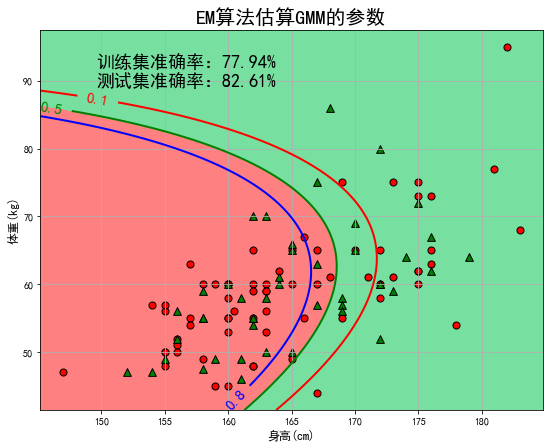

In [1]:
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
import matplotlib as mpl
import matplotlib.colors
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

def expand(a, b):
    d = (b - a) * 0.05
    return a-d, b+d

data = np.loadtxt('data/HeightWeight.csv', dtype=np.float, delimiter=',', skiprows=1)
print(data.shape)
y, x = np.split(data, [1, ], axis=1)
x, x_test, y, y_test = train_test_split(x, y, test_size=0.4, random_state=0)
gmm = GaussianMixture(n_components=2, covariance_type='full', random_state=0)
x_min = np.min(x, axis=0)
x_max = np.max(x, axis=0)
gmm.fit(x)
print('均值 = \n', gmm.means_)
print('方差 = \n', gmm.covariances_)
y_hat = gmm.predict(x)
y_test_hat = gmm.predict(x_test)
change = (gmm.means_[0][0] > gmm.means_[1][0])
if change:
    z = y_hat == 0
    y_hat[z] = 1
    y_hat[~z] = 0
    z = y_test_hat == 0
    y_test_hat[z] = 1
    y_test_hat[~z] = 0
acc = np.mean(y_hat.ravel() == y.ravel())
acc_test = np.mean(y_test_hat.ravel() == y_test.ravel())
acc_str = u'训练集准确率：%.2f%%' % (acc * 100)
acc_test_str = u'测试集准确率：%.2f%%' % (acc_test * 100)
print(acc_str)
print(acc_test_str)

cm_light = mpl.colors.ListedColormap(['#FF8080', '#77E0A0'])
cm_dark = mpl.colors.ListedColormap(['r', 'g'])
x1_min, x1_max = x[:, 0].min(), x[:, 0].max()
x2_min, x2_max = x[:, 1].min(), x[:, 1].max()
x1_min, x1_max = expand(x1_min, x1_max)
x2_min, x2_max = expand(x2_min, x2_max)
x1, x2 = np.mgrid[x1_min:x1_max:500j, x2_min:x2_max:500j]
grid_test = np.stack((x1.flat, x2.flat), axis=1)
grid_hat = gmm.predict(grid_test)
grid_hat = grid_hat.reshape(x1.shape)
if change:
    z = grid_hat == 0
    grid_hat[z] = 1
    grid_hat[~z] = 0
plt.figure(figsize=(9, 7), facecolor='w')
plt.pcolormesh(x1, x2, grid_hat, cmap=cm_light)
plt.scatter(x[:, 0], x[:, 1], s=50, c='r', marker='o', cmap=cm_dark, edgecolors='k')
plt.scatter(x_test[:, 0], x_test[:, 1], s=60, c='g', marker='^', cmap=cm_dark, edgecolors='k')

p = gmm.predict_proba(grid_test)
print(p)
p = p[:, 0].reshape(x1.shape)
CS = plt.contour(x1, x2, p, levels=(0.1, 0.5, 0.8), colors=list('rgb'), linewidths=2)
plt.clabel(CS, fontsize=15, fmt='%.1f', inline=True)
ax1_min, ax1_max, ax2_min, ax2_max = plt.axis()
xx = 0.9*ax1_min + 0.1*ax1_max
yy = 0.1*ax2_min + 0.9*ax2_max
plt.text(xx, yy, acc_str, fontsize=18)
yy = 0.15*ax2_min + 0.85*ax2_max
plt.text(xx, yy, acc_test_str, fontsize=18)
plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.xlabel(u'身高(cm)', fontsize='large')
plt.ylabel(u'体重(kg)', fontsize='large')
plt.title(u'EM算法估算GMM的参数', fontsize=20)
plt.grid()
plt.show()

## 7.2.GMM调参

[[1 0]
 [0 2]]
错误率： [0.385   0.315   0.3     0.00125]
BIC： [7990.71460065 7855.56050855 8006.49834359 6845.79374805]


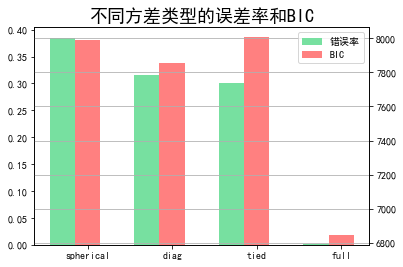

均值 = 
 [[-0.97642254 10.06927801]
 [ 2.88444448  6.69484552]]
方差 = 
 [[[ 0.91302546 -0.04298504]
  [-0.04298504  1.9603531 ]]

 [[ 2.87015473  6.64421303]
  [ 6.64421303 18.00318872]]]


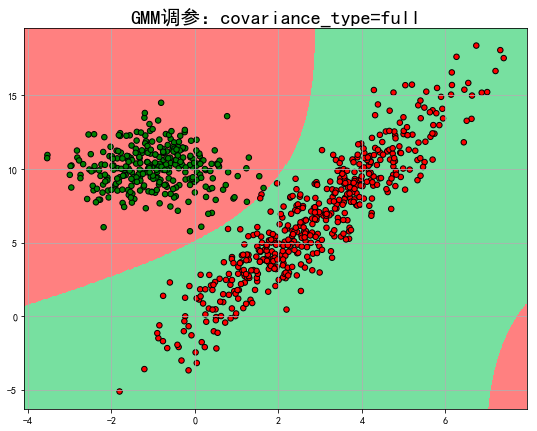

In [3]:
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib as mpl
import matplotlib.colors
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

def expand(a, b, rate=0.05):
    d = (b - a) * rate
    return a-d, b+d

def accuracy_rate(y1, y2):
    acc = np.mean(y1 == y2)
    return acc if acc > 0.5 else 1-acc

np.random.seed(0)
cov1 = np.diag((1, 2))
print(cov1)
N1 = 500
N2 = 300
N = N1 + N2
x1 = np.random.multivariate_normal(mean=(1, 2), cov=cov1, size=N1)
m = np.array(((1, 1), (1, 3)))
x1 = x1.dot(m)
x2 = np.random.multivariate_normal(mean=(-1, 10), cov=cov1, size=N2)
x = np.vstack((x1, x2))
y = np.array([0]*N1 + [1]*N2)

types = ('spherical', 'diag', 'tied', 'full')
err = np.empty(len(types))
bic = np.empty(len(types))
for i, type in enumerate(types):
    gmm = GaussianMixture(n_components=2, covariance_type=type, random_state=0)
    gmm.fit(x)
    err[i] = 1 - accuracy_rate(gmm.predict(x), y)
    bic[i] = gmm.bic(x)
print('错误率：', err.ravel())
print('BIC：', bic.ravel())
xpos = np.arange(4)
plt.figure(facecolor='w')
ax = plt.axes()
b1 = ax.bar(xpos-0.3, err, width=0.3, color='#77E0A0')
b2 = ax.twinx().bar(xpos, bic, width=0.3, color='#FF8080')
plt.grid(True)
bic_min, bic_max = expand(bic.min(), bic.max())
plt.ylim((bic_min, bic_max))
plt.xticks(xpos, types)
plt.legend([b1[0], b2[0]], (u'错误率', u'BIC'))
plt.title(u'不同方差类型的误差率和BIC', fontsize=18)
plt.show()

optimal = bic.argmin()
gmm = GaussianMixture(n_components=2, covariance_type=types[optimal], random_state=0)
gmm.fit(x)
print('均值 = \n', gmm.means_)
print('方差 = \n', gmm.covariances_)
y_hat = gmm.predict(x)

cm_light = mpl.colors.ListedColormap(['#FF8080', '#77E0A0'])
cm_dark = mpl.colors.ListedColormap(['r', 'g'])
x1_min, x1_max = x[:, 0].min(), x[:, 0].max()
x2_min, x2_max = x[:, 1].min(), x[:, 1].max()
x1_min, x1_max = expand(x1_min, x1_max)
x2_min, x2_max = expand(x2_min, x2_max)
x1, x2 = np.mgrid[x1_min:x1_max:500j, x2_min:x2_max:500j]
grid_test = np.stack((x1.flat, x2.flat), axis=1)
grid_hat = gmm.predict(grid_test)
grid_hat = grid_hat.reshape(x1.shape)
if gmm.means_[0][0] > gmm.means_[1][0]:
    z = grid_hat == 0
    grid_hat[z] = 1
    grid_hat[~z] = 0
plt.figure(figsize=(9, 7), facecolor='w')
plt.pcolormesh(x1, x2, grid_hat, cmap=cm_light)
plt.scatter(x[:, 0], x[:, 1], s=30, c=y, marker='o', cmap=cm_dark, edgecolors='k')

ax1_min, ax1_max, ax2_min, ax2_max = plt.axis()
plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.title(u'GMM调参：covariance_type=%s' % types[optimal], fontsize=20)
plt.grid()

## 7.3.GMM算法实现

SkLearn准确率：89.80%
Python准确率：89.80%


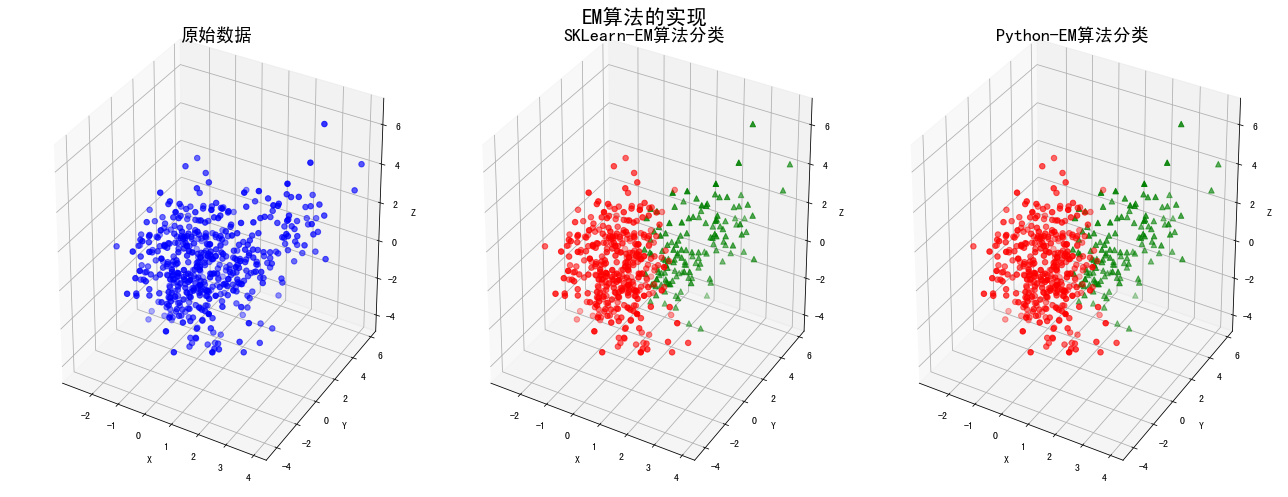

In [2]:
import numpy as np
from scipy.stats import multivariate_normal
from sklearn.mixture import GaussianMixture
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import pairwise_distances_argmin
from mpl_toolkits.mplot3d import Axes3D
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

style = ''
np.random.seed(0)
mu1_fact = (0, 0, 0)
cov1_fact = np.diag((1, 2, 3))
data1 = np.random.multivariate_normal(mu1_fact, cov1_fact, 400)
mu2_fact = (2, 2, 1)
cov2_fact = np.array(((1, 1, 3), (1, 2, 1), (0, 0, 1)))
data2 = np.random.multivariate_normal(mu2_fact, cov2_fact, 100)
data = np.vstack((data1, data2))
y = np.array([True] * 400 + [False] * 100)

fig = plt.figure(figsize=(18, 7), facecolor='w')
ax = fig.add_subplot(131, projection='3d')
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c='b', s=30, marker='o', depthshade=True)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title(u'原始数据', fontsize=18)

g = GaussianMixture(n_components=2, covariance_type='full', tol=1e-6, max_iter=1000)
g.fit(data)
sklearn_mu1, sklearn_mu2 = g.means_
sklearn_sigma1, sklearn_sigma2 = g.covariances_
norm1 = multivariate_normal(sklearn_mu1, sklearn_sigma1)
norm2 = multivariate_normal(sklearn_mu2, sklearn_sigma2)
tau1 = norm1.pdf(data)
tau2 = norm2.pdf(data)

ax = fig.add_subplot(132, projection='3d')
order = pairwise_distances_argmin([mu1_fact, mu2_fact], [sklearn_mu1, sklearn_mu2], metric='euclidean')
if order[0] == 0:
    c1 = tau1 > tau2
else:
    c1 = tau1 < tau2
c2 = ~c1
acc = np.mean(y == c1)
print(u'SkLearn准确率：%.2f%%' % (100*acc))
ax.scatter(data[c1, 0], data[c1, 1], data[c1, 2], c='r', s=30, marker='o', depthshade=True)
ax.scatter(data[c2, 0], data[c2, 1], data[c2, 2], c='g', s=30, marker='^', depthshade=True)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title(u'SKLearn-EM算法分类', fontsize=18)

num_iter = 100
n, d = data.shape

python_mu1 = data.min(axis=0)
python_mu2 = data.max(axis=0)
python_sigma1 = np.identity(d)
python_sigma2 = np.identity(d)
pi = 0.5
# EM
for i in range(num_iter):
    # E Step
    norm1 = multivariate_normal(python_mu1, python_sigma1)
    norm2 = multivariate_normal(python_mu2, python_sigma2)
    tau1 = pi * norm1.pdf(data)
    tau2 = (1 - pi) * norm2.pdf(data)
    gamma = tau1 / (tau1 + tau2)

    # M Step
    python_mu1 = np.dot(gamma, data) / np.sum(gamma)
    python_mu2 = np.dot((1 - gamma), data) / np.sum((1 - gamma))
    python_sigma1 = np.dot(gamma * (data - python_mu1).T, data - python_mu1) / np.sum(gamma)
    python_sigma2 = np.dot((1 - gamma) * (data - python_mu2).T, data - python_mu2) / np.sum(1 - gamma)
    pi = np.sum(gamma) / n

norm1 = multivariate_normal(python_mu1, python_sigma1)
norm2 = multivariate_normal(python_mu2, python_sigma2)
tau1 = norm1.pdf(data)
tau2 = norm2.pdf(data)

ax = fig.add_subplot(133, projection='3d')
order = pairwise_distances_argmin([mu1_fact, mu2_fact], [python_mu1, python_mu2], metric='euclidean')

if order[0] == 0:
    c1 = tau1 > tau2
else:
    c1 = tau1 < tau2
c2 = ~c1
acc = np.mean(y == c1)
print(u'Python准确率：%.2f%%' % (100*acc))
ax.scatter(data[c1, 0], data[c1, 1], data[c1, 2], c='r', s=30, marker='o', depthshade=True)
ax.scatter(data[c2, 0], data[c2, 1], data[c2, 2], c='g', s=30, marker='^', depthshade=True)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title(u'Python-EM算法分类', fontsize=18)

plt.suptitle(u'EM算法的实现', fontsize=21)
plt.subplots_adjust(top=0.90)
plt.tight_layout()

## 7.4.使用Python Code实现GMM

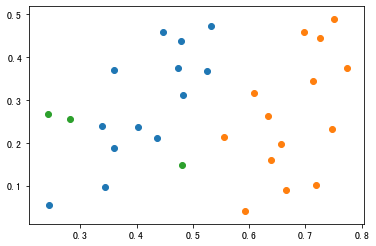

In [3]:
import math
import numpy as np

def calculate_covariance_matrix(X, Y=None):
    """ Calculate the covariance matrix for the dataset X """
    if Y is None:
        Y = X
    n_samples = np.shape(X)[0]
    covariance_matrix = (1 / (n_samples-1)) * (X - X.mean(axis=0)).T.dot(Y - Y.mean(axis=0))

    return np.array(covariance_matrix, dtype=float)

def euclidean_distance(x1, x2):
    """ Calculates the l2 distance between two vectors """
    distance = 0
    # Squared distance between each coordinate
    for i in range(len(x1)):
        distance += pow((x1[i] - x2[i]), 2)
    return math.sqrt(distance)
class GaussianMixtureModel():
    def __init__(self,k=3,max_iterations=400,tolerance=1e-8):
        self.k = k
        self.parameters = []
        self.max_iterations = max_iterations
        self.tolerance = tolerance
        self.responsibilities = []
        self.sample_assignments = None
        self.responsibility = None
    def _init_random_gaussians(self, X):
        n_samples = np.shape(X)[0]
        self.priors = (1./self.k) * np.ones(self.k)
        for i in range(self.k):
            params = {}
            params['mean'] = X[np.random.choice(range(n_samples))]
            params["cov"] = calculate_covariance_matrix(X)
            self.parameters.append(params)

    # 计算多元高斯分布
    def multivariate_gaussian(self, X, params):
        n_features = np.shape(X)[1]
        mean = params["mean"]
        covar = params["cov"]
        determinant = np.linalg.det(covar)
        likelihoods = np.zeros(np.shape(X)[0])
        for i, sample in enumerate(X):
            d = n_features
            coeff = (1./(math.pow(2*math.pi,d/2)*math.sqrt(determinant)))
            exponent = math.exp(-0.5 * (sample - mean).T.dot(np.linalg.pinv(covar)).dot((sample - mean)))
            likelihoods[i] = coeff * exponent

        return likelihoods
    def _get_likelihoods(self, X):
        n_samples = np.shape(X)[0]
        likelihoods = np.zeros((n_samples, self.k))
        for i in range(self.k):
            likelihoods[:,i] = self.multivariate_gaussian(X,self.parameters[i])
        return likelihoods
    # E步
    def _expectation(self, X):
        weighted_likelihoods = self._get_likelihoods(X) * self.priors
        sum_likelihoods = np.expand_dims(np.sum(weighted_likelihoods, axis=1), axis=1)
        self.responsibility = weighted_likelihoods / sum_likelihoods
        self.sample_assignments = self.responsibility.argmax(axis=1)
        self.responsibilities.append(np.max(self.responsibility, axis=1))
    # M步
    def _maximization(self, X):
        for i in range(self.k):
            resp = np.expand_dims(self.responsibility[:, i], axis=1)
            mean = (resp * X).sum(axis=0) / resp.sum()
            covariance = (X - mean).T.dot((X - mean) * resp) / resp.sum()
            self.parameters[i]["mean"], self.parameters[i]["cov"] = mean, covariance
        n_samples = np.shape(X)[0]
        self.priors = self.responsibility.sum(axis=0) / n_samples

    def _converged(self, X):
        if len(self.responsibilities) < 2:
            return False
        diff = np.linalg.norm(
            self.responsibilities[-1] - self.responsibilities[-2])
        return diff <= self.tolerance
    def predict(self,X):
        self._init_random_gaussians(X)
        for _ in range(self.max_iterations):
            self._expectation(X)
            self._maximization(X)
            if self._converged(X):
                break
        self._expectation(X)
        return self.sample_assignments

from matplotlib import pyplot as plt
X = np.array([[ 0.697  ,0.46 ],
              [ 0.774  ,0.376],
              [ 0.634  ,0.264],
              [ 0.608  ,0.318],
              [ 0.556  ,0.215],
              [ 0.403  ,0.237],
              [ 0.481  ,0.149],
              [ 0.437  ,0.211],
              [ 0.666  ,0.091],
              [ 0.243  ,0.267],
              [ 0.245  ,0.057],
              [ 0.343  ,0.099],
              [ 0.639  ,0.161],
              [ 0.657  ,0.198],
              [ 0.36   ,0.37 ],
              [ 0.593  ,0.042],
              [ 0.719  ,0.103],
              [ 0.359  ,0.188],
              [ 0.339  ,0.241],
              [ 0.282  ,0.257],
              [ 0.748  ,0.232],
              [ 0.714  ,0.346],
              [ 0.483  ,0.312],
              [ 0.478  ,0.437],
              [ 0.525  ,0.369],
              [ 0.751  ,0.489],
              [ 0.532  ,0.472],
              [ 0.473  ,0.376],
              [ 0.725  ,0.445],
              [ 0.446  ,0.459]])
clf = GaussianMixtureModel(k=3,max_iterations=10000,tolerance=1e-15)
res = clf.predict(X)
k0 = X[res==0]
k1 = X[res==1]
k2 = X[res==2]
plt.figure(facecolor='w')
plt.scatter(k0[:,0],k0[:,1])
plt.scatter(k1[:,0],k1[:,1])
plt.scatter(k2[:,0],k2[:,1])